In [81]:
from arch import arch_model
import sqlalchemy as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 10)

In [82]:
engine = sql.create_engine("postgresql://postgres@localhost/optiondata")
data = pd.read_sql("SELECT * FROM underlying_data WHERE symbol='SPX' AND data_type='TRADES' ORDER BY date ASC", engine)
returns = np.diff(np.log(data['close']))

AIC:  -8875.160394229773


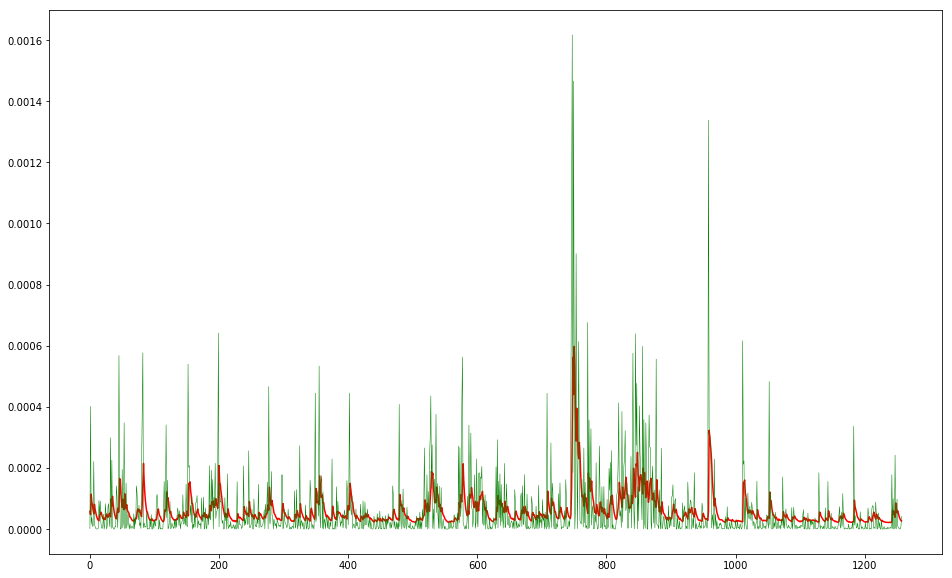

In [83]:
model = arch_model(returns)
results = model.fit(disp='off')
print("AIC: ", results.aic)
plt.plot(np.square(results.conditional_volatility), 'r')
plt.plot(np.square(returns), 'g', linewidth=0.5)

In [107]:
forecast = results.forecast(horizon=60)
values = forecast.variance[-1:].values[0]

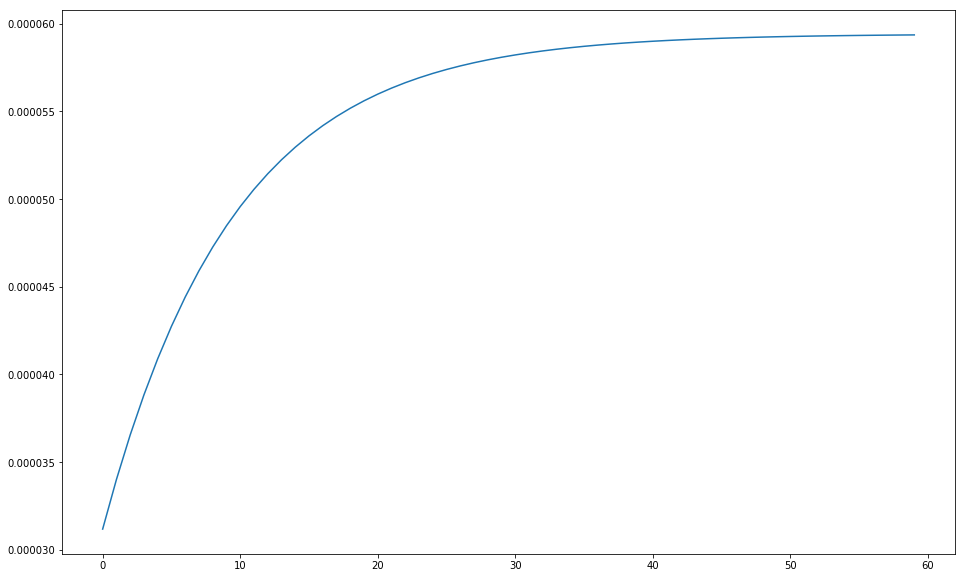

In [110]:
plt.plot(values)